In [2]:
#import and set the file

import pandas as pd

exchange_rates = pd.read_csv('euro-daily-hist_1999_2020.csv')
exchange_rates.head()
exchange_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5699 entries, 0 to 5698
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              5699 non-null   object 
 1   [Australian dollar ]      5699 non-null   object 
 2   [Bulgarian lev ]          5297 non-null   object 
 3   [Brazilian real ]         5431 non-null   object 
 4   [Canadian dollar ]        5699 non-null   object 
 5   [Swiss franc ]            5699 non-null   object 
 6   [Chinese yuan renminbi ]  5431 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           5699 non-null   object 
 9   [Danish krone ]           5699 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      5699 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       5699 non-null   object 
 14  [Croatia

In [3]:
#clean up
exchange_rates.rename(columns={'[US dollar ]': 'US_dollar',
                               'Period\\Unit:': 'Time'},
                      inplace=True)
exchange_rates['Time'] = pd.to_datetime(exchange_rates['Time'])
exchange_rates.sort_values('Time', inplace=True)
exchange_rates.reset_index(drop=True, inplace=True)
exchange_rates.head()

#split
euro_to_dollar = exchange_rates[['Time', 'US_dollar']].copy()
euro_to_dollar['US_dollar'].value_counts()

-         62
1.2276     9
1.1215     8
1.1305     7
1.1346     6
          ..
1.0013     1
1.0276     1
1.3953     1
1.0812     1
1.1395     1
Name: US_dollar, Length: 3528, dtype: int64

In [5]:
#drop - rows
euro_to_dollar = euro_to_dollar[euro_to_dollar['US_dollar'] != '-']
euro_to_dollar['US_dollar'] = euro_to_dollar['US_dollar'].astype(float)
euro_to_dollar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5637 entries, 0 to 5698
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Time       5637 non-null   datetime64[ns]
 1   US_dollar  5637 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 132.1 KB


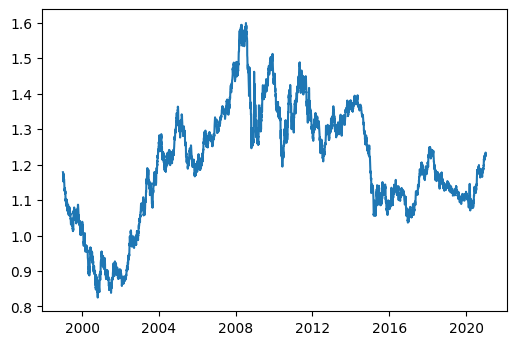

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(euro_to_dollar['Time'], euro_to_dollar['US_dollar'])
plt.show()

In [7]:
euro_to_dollar['rolling_mean'] = euro_to_dollar['US_dollar'].rolling(30).mean()
euro_to_dollar

,Time,US_dollar,rolling_mean
0,1999-01-04,1.1789,NaN
1,1999-01-05,1.1790,NaN
2,1999-01-06,1.1743,NaN
3,1999-01-07,1.1632,NaN
4,1999-01-08,1.1659,NaN
...,...,...,...
5694,2021-01-04,1.2296,1.211170
5695,2021-01-05,1.2271,1.212530
5696,2021-01-06,1.2338,1.213987
5697,2021-01-07,1.2276,1.215357


In [8]:
bush = euro_to_dollar.copy(
                   )[(euro_to_dollar['Time'].dt.year >= 2001
                   ) & (euro_to_dollar['Time'].dt.year <= 2009)]
obama = euro_to_dollar.copy(
                   )[(euro_to_dollar.Time.dt.year >= 2009
                   ) & (euro_to_dollar.Time.dt.year <= 2017)]
trump = euro_to_dollar.copy(
                   )[(euro_to_dollar.Time.dt.year >= 2017
                   ) & (euro_to_dollar.Time.dt.year <= 2021)]

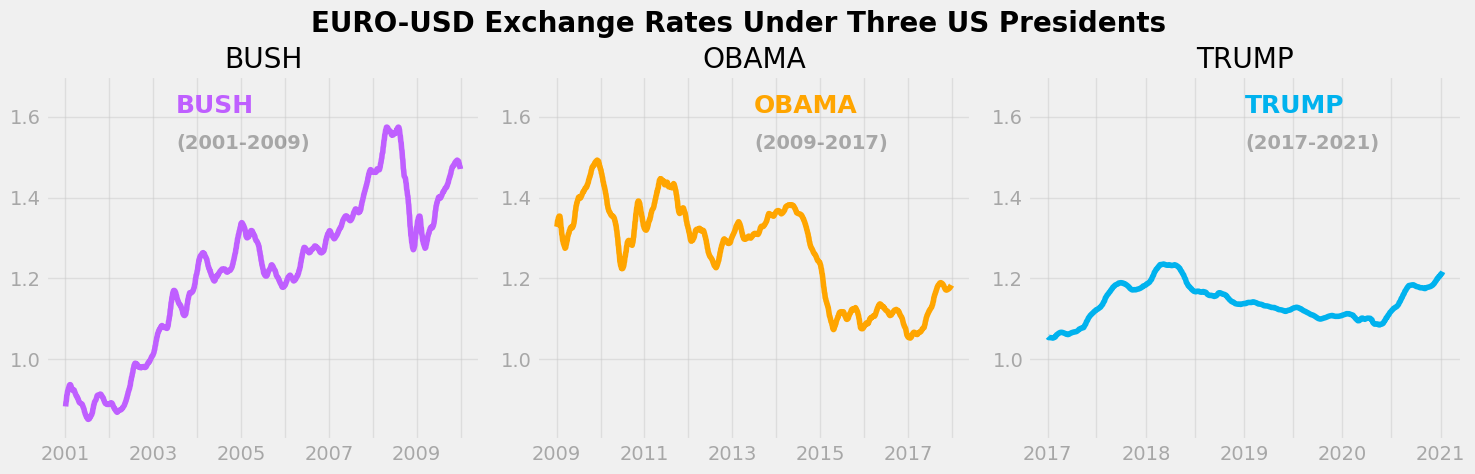

In [42]:
import matplotlib.pyplot as plt
import matplotlib.style as style

style.use('fivethirtyeight')

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for ax in axes:
    ax.set_ylim(0.8, 1.7)
    ax.set_yticks([1.0, 1.2, 1.4, 1.6])
    ax.set_yticklabels(['1.0', '1.2','1.4', '1.6'],
                   alpha=0.3)
    ax.grid(alpha=0.5)    

# Plot 1: Bush
axes[0].plot(bush['Time'], bush['rolling_mean'], color='#BF5FFF')
axes[0].set_xticklabels(['', '2001', '', '2003', '', '2005', '', '2007', '', '2009'], alpha=0.3)
axes[0].set_title('BUSH')
axes[0].text(0.3, 0.9, 'BUSH', fontsize=18, weight='bold', color='#BF5FFF', transform=axes[0].transAxes)
axes[0].text(0.3, 0.8, '(2001-2009)', weight='bold', alpha=0.3, transform=axes[0].transAxes)

# Plot 2: Obama
axes[1].plot(obama['Time'], obama['rolling_mean'], color='#ffa500')
axes[1].set_xticklabels(['', '2009', '', '2011', '', '2013', '', '2015', '', '2017'], alpha=0.3)
axes[1].set_title('OBAMA')
axes[1].text(0.5, 0.9, 'OBAMA', fontsize=18, weight='bold', color='#ffa500', transform=axes[1].transAxes)
axes[1].text(0.5, 0.8, '(2009-2017)', weight='bold', alpha=0.3, transform=axes[1].transAxes)

# Plot 3: Trump
axes[2].plot(trump['Time'], trump['rolling_mean'], color='#00B2EE')
axes[2].set_xticklabels(['2017', '', '2018', '', '2019', '', '2020', '', '2021'], alpha=0.3)
axes[2].set_title('TRUMP')
axes[2].text(0.5, 0.9, 'TRUMP', fontsize=18, weight='bold', color='#00B2EE', transform=axes[2].transAxes)
axes[2].text(0.5, 0.8, '(2017-2021)', weight='bold', alpha=0.3, transform=axes[2].transAxes)

fig.suptitle('EURO-USD Exchange Rates Under Three US Presidents', fontsize=20, weight='bold')
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()
